## Lighthouse Labs
### W07D2 Deployment of ML Models

Instructor: Sabya DG

Credit: [Socorro Dominguez](https://github.com/sedv8808/LighthouseLabs/tree/main/W07D2)

Let's create a super fast model for predicting Boston's house pricing.

Disclaimer: we are just quickly creating a trained model. No pre-processing, hyperparameter tuning, etc.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

#importing dataset from sklearn
from sklearn.datasets import load_boston
boston_data = load_boston()

In [4]:
# initializing dataset
data_ = pd.DataFrame(boston_data.data)

### Top five rows of dataset
data_.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Adding names to our columns
data_.columns = boston_data.feature_names
data_.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# Target feature of Boston Housing data
data_['PRICE'] = boston_data.target

In [7]:
# creating feature and target variable 
X = data_.drop(['PRICE'], axis=1)
y = data_['PRICE']

In [8]:
X.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [9]:
# splitting into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
print("X training shape : ", X_train.shape)
print("X test shape : ", X_test.shape )
print("y training shape :", y_train.shape )
print("y test shape :", y_test.shape )

X training shape :  (404, 13)
X test shape :  (102, 13)
y training shape : (404,)
y test shape : (102,)


In [11]:
 # creating model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [12]:
# Model evaluation for training data
prediction = regressor.predict(X_train)
print("r^2 : ", metrics.r2_score(y_train, prediction))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_train, prediction))
print("Mean Squared Error: ", metrics.mean_squared_error(y_train, prediction))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_train, prediction)))

r^2 :  0.9825482626793903
Mean Absolute Error:  0.818737623762375
Mean Squared Error:  1.4097755099009888
Root Mean Squared Error :  1.1873396775569276


In [13]:
# Model evaluation for testing data
prediction_test = regressor.predict(X_test)
print("r^2 : ", metrics.r2_score(y_test, prediction_test))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, prediction_test))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, prediction_test))
print("Root Mean Absolute Error : ", np.sqrt(metrics.mean_squared_error(y_test, prediction_test)))

r^2 :  0.9152463366743689
Mean Absolute Error :  2.280823529411764
Mean Squared Error :  8.375983294117647
Root Mean Absolute Error :  2.894129108059564


In [15]:
#Lets have a look at the Test data  
y_test.head(10)

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
132    23.0
292    27.9
31     14.5
218    21.5
90     22.6
Name: PRICE, dtype: float64

In [16]:
prediction_test

array([30.576, 27.212, 19.563, 20.68 , 19.872, 19.461, 27.298, 18.94 ,
       20.341, 23.28 , 28.432, 31.103, 20.74 , 20.243, 20.669, 26.1  ,
       11.924, 41.326, 24.122, 14.743, 20.212, 16.661, 24.082, 23.945,
       26.356,  9.456, 14.629, 19.932, 43.039, 12.512, 26.306, 20.028,
       47.689, 15.848, 23.865, 20.934, 15.535, 33.362, 13.595, 19.499,
       24.616, 23.085, 25.825, 15.552, 15.623, 11.075, 47.369, 11.867,
       21.488, 19.056, 23.706, 21.503, 25.318, 20.989, 11.315, 23.998,
       11.733, 23.408, 18.826, 42.963, 15.051, 25.963, 13.106, 14.534,
       17.991, 33.183, 42.084, 24.917, 21.195, 20.68 , 23.978,  7.319,
       18.136, 21.451, 19.7  , 20.629, 43.572, 24.273, 27.2  , 32.872,
       17.186, 20.871, 33.603, 11.64 , 24.558, 25.156, 14.741, 24.897,
       19.612, 17.034, 27.207, 44.758, 16.669, 21.199, 15.127, 20.624,
       23.105, 23.586, 42.522, 20.593, 15.608, 15.745])

/Users/sadasgu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


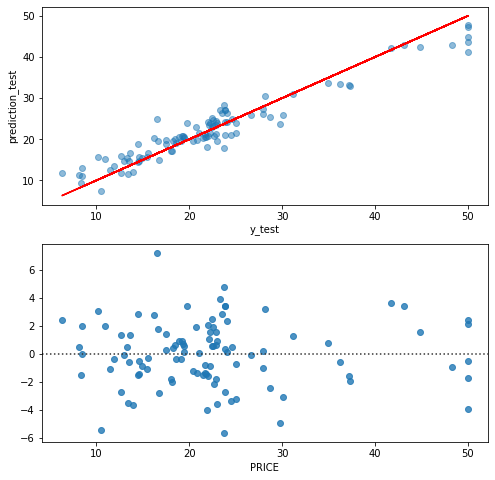

In [24]:
# Visualizing the difference between actual prices and predicted values and add a best fit line with residual plot
plt.figure(figsize=(8,8))
#add residual plot

plt.subplot(2,1,1)  

plt.scatter(y_test, prediction_test, alpha=0.5)

plt.plot(y_test, y_test, color='red')

plt.xlabel("y_test")
plt.ylabel("prediction_test")
plt.subplot(2,1,2)      
sns.residplot(y_test, prediction_test)
plt.show()  


In [25]:
# saving the model
import pickle

# saving the columns
model_columns = list(X.columns)
with open('model_columns.pkl','wb') as file:
    pickle.dump(model_columns, file)
    
    
pickle.dump(regressor, open('regressor.pkl', 'wb'))

# Create app.py

Once we save our trained pickle model, we need to create a script named [app.py](app.py) to run the deployment.

Once app.py is created, run it:
1. Open terminal
1. Go to working directory `cd .\Dropbox\LighthouseLabs\DataScienceBootcamp\W07D2-ModelDeployment\`
1. `python app.py`

- 127.0.0.1:5000
- 127.0.0.1:5000/predict

## Running our Work on an API
### Checking on Postman

1. Let's review how to do a script and do the script in your favourite IDE.
2. From Terminal, navigate to the root folder of your app and run:
`python3 app.py`
3. An HTML link will pop up, copy it.
4. Open Postman. In the URL section, paste the link. You will see the greeting.
5. Append to the link `/predict`, change to POST, and choose Body, raw, and JSON
6. Copy the following Examples:



Example 1

```
[
    {
    "CRIM" : 0.0063,
    "ZN" : 10.0,
    "INDUS" : 2.31,
    "CHAS" : 0.0,
    "NOX" : 0.0538,
    "RM" : 6.575,
    "AGE" : 65.2,
    "DIS" : 4.0900,
    "RAD" : 1.0,
    "TAX" : 296.0,
    "PTRATIO" : 15.3,
    "B" : 369.90,
    "LSTAT": 0
    }
]
```

### Running API through Python
We can also make a POST request through python.
1. view test.py
1. Open another terminal and run `python test.py`